In [1]:
import numpy as np
import pandas as pd
import sys
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix
import numpy
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.metrics.pairwise import cosine_similarity



In [2]:
user = pd.read_csv(r'/Users/rimzimthube/Downloads/yelp_user.csv', low_memory=False,nrows=25000)


In [3]:
business = pd.read_csv(r'/Users/rimzimthube/Downloads/yelp_business.csv', low_memory=False,nrows=25000)


In [4]:
review = pd.read_csv(r'/Users/rimzimthube/Downloads/yelp_review.csv', low_memory=False,nrows=25000)


In [5]:
reviews = review.sample(frac =.25)
business = business.sample(frac =.25)
user = user.sample(frac =.25)

In [6]:
business['categories'] = business['categories'].astype(str)
restaurant_df = business[business['categories'].str.contains('Food|Coffee|Tea|Restaurants|Bakeries|Bars|Sports Bar|Pubs|Nightlife')==True]
metadata = restaurant_df.merge(review,on='business_id').merge(user,on='user_id').replace({'\"': ''}, regex=True)
metadata.head()
metadata['user_id'].head(20)
metadata[['text','user_id']].head()
metadata.head()

,business_id,name_x,neighborhood,address,city,state,postal_code,latitude,longitude,stars_x,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,_pBXtjN43eqMV0XZTz7nmw,Surrender Nightclub,The Strip,3131 Las Vegas Blvd S,Las Vegas,NV,89109,36.129243,-115.165644,3.5,...,8,5,39,5,49,225,227,227,31,9
1,eoHdUeQDNgQ6WYEnP2aiRw,Serendipity 3,The Strip,"Caesars Palace Las Vegas Hotel And Casino, 357...",Las Vegas,NV,89109,36.115670,-115.173317,3.0,...,8,5,39,5,49,225,227,227,31,9
2,H8qpFitIesth86zqR4cwYg,Jean Philippe Patisserie,The Strip,3730 Las Vegas Blvd S,Las Vegas,NV,89109,36.107727,-115.176986,4.0,...,8,5,39,5,49,225,227,227,31,9
3,_pBXtjN43eqMV0XZTz7nmw,Surrender Nightclub,The Strip,3131 Las Vegas Blvd S,Las Vegas,NV,89109,36.129243,-115.165644,3.5,...,0,0,0,0,0,0,0,0,0,0
4,_pBXtjN43eqMV0XZTz7nmw,Surrender Nightclub,The Strip,3131 Las Vegas Blvd S,Las Vegas,NV,89109,36.129243,-115.165644,3.5,...,0,2,0,2,4,8,10,10,2,1


<Figure size 864x288 with 0 Axes>

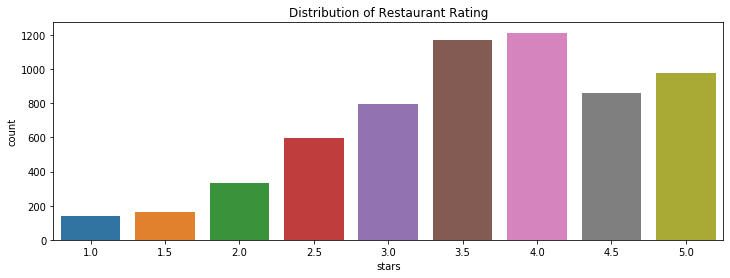

<Figure size 864x288 with 0 Axes>

In [7]:
plt.figure(figsize=(12,4))
ax = sns.countplot(business['stars'])
plt.title('Distribution of Restaurant Rating');
plt.figure(figsize=(12,4))


Text(0.5, 1.0, 'Top 20 cities by reviews')

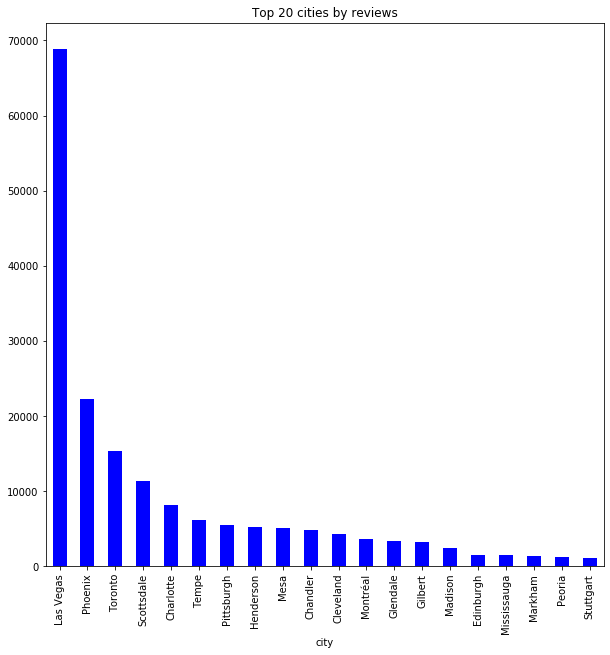

In [8]:
city_business_reviews = business[['city', 'review_count', 'stars']].groupby(['city']).agg({'review_count': 'sum', 'stars': 'mean'}).sort_values(by='review_count', ascending=False)
city_business_reviews['review_count'][0:20].plot(kind='bar', stacked=False, figsize=[10,10], colormap='winter')
plt.title('Top 20 cities by reviews')

In [9]:
metadata['user_id']

0      cvzKVWaGFysF1iZ1RUvsBg
1      cvzKVWaGFysF1iZ1RUvsBg
2      cvzKVWaGFysF1iZ1RUvsBg
3      HQ022k_yb5PJ4gC2JA3nCw
4      RSLTG7N0wYJhRTW5CGEm5Q
                ...          
106    NUV1d-OdKgL6VTuTeVGz2w
107    CFyvX-AZh6cunAMu_zoF_w
108    snDjs1hdh7JOWv4jjbXPDw
109    Q58U8-HyTDAYEGY13DLEUw
110    msZa1cuJ3CM5T51XP3ZIeA
Name: user_id, Length: 111, dtype: object

In [10]:
userid='cvzKVWaGFysF1iZ1RUvsBg'

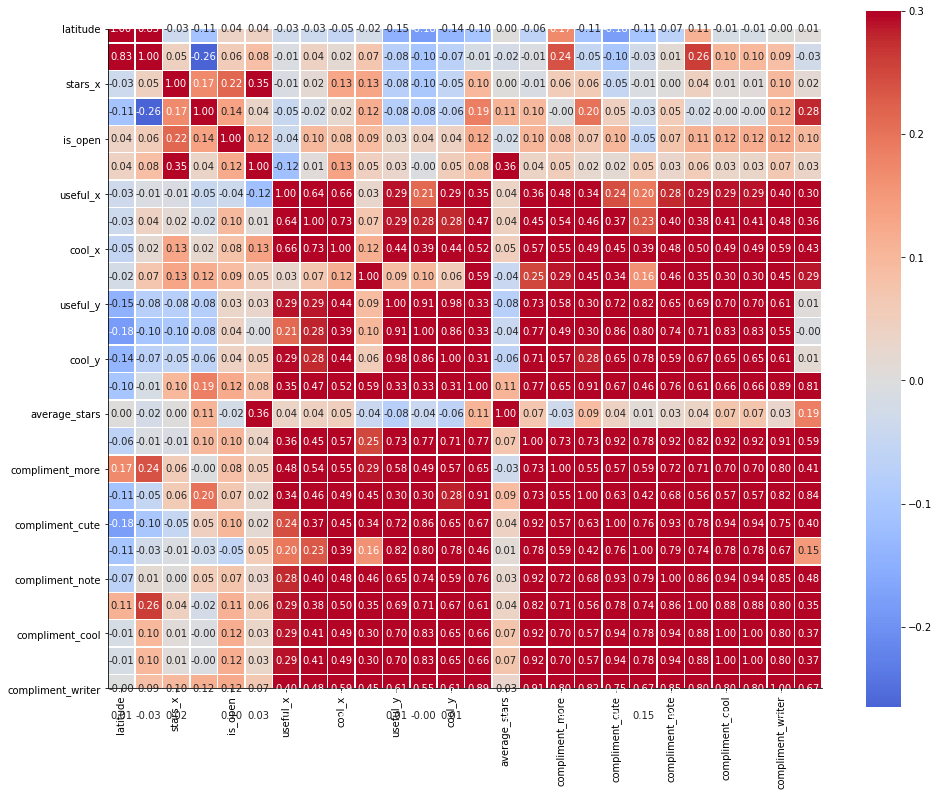

In [11]:
corr = metadata.corr()
g = sns.heatmap(corr,  vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
g.figure.set_size_inches(16,16)
plt.show()

In [12]:
rest = metadata[metadata['user_id'].str.contains(userid)==True ]
resr=rest[rest['stars_x'].astype(str).str.contains("5|4.5|4|3.5|3")==True]

rest.head()


,business_id,name_x,neighborhood,address,city,state,postal_code,latitude,longitude,stars_x,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
2,i39--wZD6L9hm9Lg90Uziw,Central Diner & Grille,NaN,6408 Steubenville Pike,Pittsburgh,PA,15205,40.448699,-80.156811,4.0,...,6,1,0,0,11,17,29,29,13,2
3,3eexaenBq8HvkTiYjVl3Pg,McKnight Kitchen,NaN,4860 McKnight Rd,Pittsburgh,PA,15237,40.529453,-80.008415,4.0,...,6,1,0,0,11,17,29,29,13,2
4,gldPX9ANF5Nic0N7igu2og,Condado Tacos,Downtown,971 Liberty Ave,Pittsburgh,PA,15222,40.443809,-79.995486,4.0,...,6,1,0,0,11,17,29,29,13,2
5,dQj5DLZjeDK3KFysh1SYOQ,Apteka,Bloomfield,4606 Penn Ave,Pittsburgh,PA,15224,40.465635,-79.949324,4.5,...,6,1,0,0,11,17,29,29,13,2
6,1WBGs0wJYK68UJ2DwUAI_A,Grapperia,Lawrenceville,3801 Butler St,Pittsburgh,PA,15201,40.467050,-79.964416,4.5,...,6,1,0,0,11,17,29,29,13,2


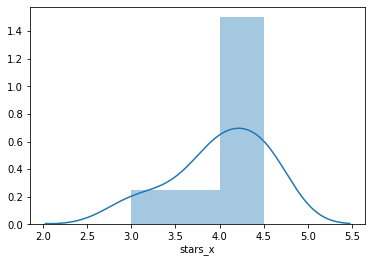

In [13]:
sns.distplot(rest['stars_x'])

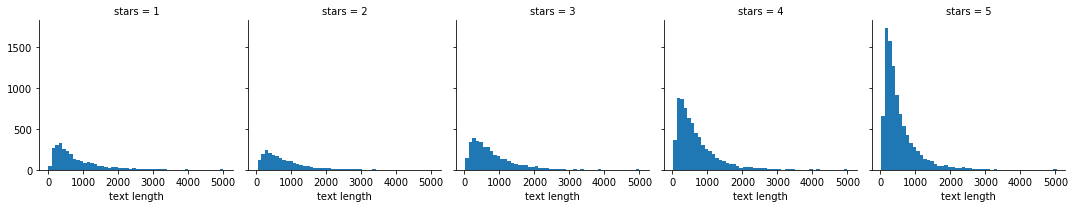

In [14]:
#length of reviews text
review['text length'] = review['text'].apply(len)
review.head()
g = sns.FacetGrid(data=review, col='stars')
g.map(plt.hist, 'text length', bins=50)

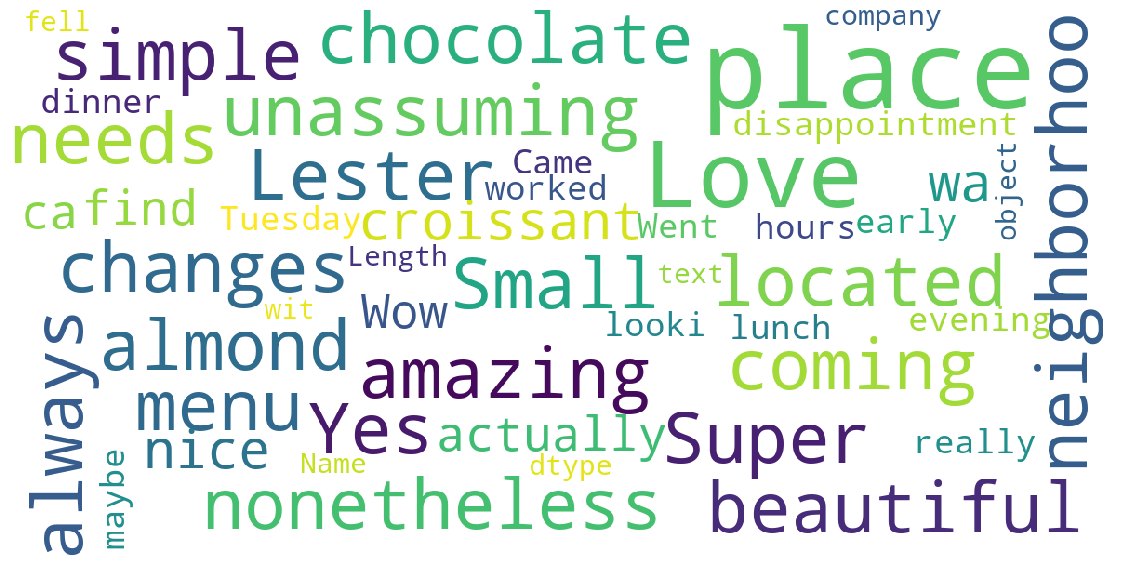

In [15]:
data=review["text"]

wordcloud = WordCloud(
background_color = 'white',
    max_words = 200,
        
max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

fig = plt.figure(1, figsize = (20, 20))
plt.axis('off')

fig.suptitle(None, fontsize = 20)
fig.subplots_adjust(top = 2.3)

plt.imshow(wordcloud)
plt.show()
    



In [16]:
tfidf = TfidfVectorizer(stop_words='english')
rest['text'] = rest['text'].fillna('')  
tfidf_matrix = tfidf.fit_transform(rest['text'])
tfidf_matrix.shape
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
indices = pd.Series(rest.index, index=rest['name_x']).drop_duplicates()
print(indices)

name_x
Central Diner & Grille       2
McKnight Kitchen             3
Condado Tacos                4
Apteka                       5
Grapperia                    6
The Flame BBQ                7
Grist House Craft Brewery    8
Sesame Inn                   9
dtype: int64


/Users/rimzimthube/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
rest.head()

,business_id,name_x,neighborhood,address,city,state,postal_code,latitude,longitude,stars_x,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
2,i39--wZD6L9hm9Lg90Uziw,Central Diner & Grille,NaN,6408 Steubenville Pike,Pittsburgh,PA,15205,40.448699,-80.156811,4.0,...,6,1,0,0,11,17,29,29,13,2
3,3eexaenBq8HvkTiYjVl3Pg,McKnight Kitchen,NaN,4860 McKnight Rd,Pittsburgh,PA,15237,40.529453,-80.008415,4.0,...,6,1,0,0,11,17,29,29,13,2
4,gldPX9ANF5Nic0N7igu2og,Condado Tacos,Downtown,971 Liberty Ave,Pittsburgh,PA,15222,40.443809,-79.995486,4.0,...,6,1,0,0,11,17,29,29,13,2
5,dQj5DLZjeDK3KFysh1SYOQ,Apteka,Bloomfield,4606 Penn Ave,Pittsburgh,PA,15224,40.465635,-79.949324,4.5,...,6,1,0,0,11,17,29,29,13,2
6,1WBGs0wJYK68UJ2DwUAI_A,Grapperia,Lawrenceville,3801 Butler St,Pittsburgh,PA,15201,40.467050,-79.964416,4.5,...,6,1,0,0,11,17,29,29,13,2


In [18]:
print(rest.name_x.iloc[0])

Central Diner & Grille


In [19]:
rest.head()

name_x=rest.name_x.iloc[0]

idx = indices[name_x]
sim_scores = list(enumerate(cosine_sim[idx]))
sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
sim_scores = sim_scores[1:11]
rest_indices1 = [i[0] for i in sim_scores]
contentBased= rest['business_id'].iloc[rest_indices1]

print(type(contentBased))
print(contentBased)



<class 'pandas.core.series.Series'>
5    dQj5DLZjeDK3KFysh1SYOQ
3    3eexaenBq8HvkTiYjVl3Pg
2    i39--wZD6L9hm9Lg90Uziw
7    Idow0ymZ7ptpoeVPwzqOPQ
6    1WBGs0wJYK68UJ2DwUAI_A
8    vC99Gqe6d7OWCngF3rqqDg
9    a5xUI7TvsNhM5gZr6KowDg
Name: business_id, dtype: object


In [20]:
print(contentBased)

5    dQj5DLZjeDK3KFysh1SYOQ
3    3eexaenBq8HvkTiYjVl3Pg
2    i39--wZD6L9hm9Lg90Uziw
7    Idow0ymZ7ptpoeVPwzqOPQ
6    1WBGs0wJYK68UJ2DwUAI_A
8    vC99Gqe6d7OWCngF3rqqDg
9    a5xUI7TvsNhM5gZr6KowDg
Name: business_id, dtype: object


In [21]:
#Collaborative 

reviews1 = reviews[['user_id', 'business_id', 'stars']]
reviews2 = reviews1.rename(columns = {'stars':'UserRating'})
reviews2.dropna(inplace=True)





In [22]:
business1 = business[['business_id', 'name', 'city', 'stars', 'review_count', 'categories']]
business2 = business1.rename(columns = {'stars':'RestaurantRating'})

#business = business.withColumnRenamed('stars', 'RestaurantRating')

business2.dropna(inplace=True)
business3 = business2[business2['categories'].str.contains("Food|Coffee|Tea|Restaurants|Bakeries|Bars|Sports Bar|Pubs|Nighlife")]

business=business3

In [23]:
JoinedRestaurantRating = pd.merge(business, reviews, on='business_id')
RestaurantRatingCount = (JoinedRestaurantRating.
     groupby(by = ['name'])['RestaurantRating'].
     count().
     reset_index().
      rename(columns = {'RestaurantRating': 'totalRatingCount'})
     [['name', 'totalRatingCount']]
    )
RestaurantRatingCount.head()

RatingAndTotalCountRestaurants = JoinedRestaurantRating.merge(RestaurantRatingCount, left_on = 'name', right_on = 'name', how = 'left')

RatingAndTotalCountRestaurants.head()

TopRestRatings = RatingAndTotalCountRestaurants['totalRatingCount'].quantile(0.90)

MostPopularRestaurants = RatingAndTotalCountRestaurants.query('totalRatingCount >= @TopRestRatings')
MostPopularRestaurants.shape

(25, 15)

In [25]:
RestaurantsByCity = MostPopularRestaurants[MostPopularRestaurants['city'].str.contains("Las Vegas|Pheonix|Toronto|Scottsdale|Charlotte|Tempe|Chandler|Cleveland|Madison|Gilbert")]

RestaurantsByCity = RestaurantsByCity.drop_duplicates(['user_id', 'name'])

SelectedRestaurantFeatures = RestaurantsByCity.pivot(index = 'business_id', columns = 'user_id', values = 'RestaurantRating').fillna(0)

SelectedRestaurantFeatures_matrix = csr_matrix(SelectedRestaurantFeatures.values)

model = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model.fit(SelectedRestaurantFeatures_matrix)

randomChoice = np.random.choice(SelectedRestaurantFeatures.shape[0])
distances, indices = model.kneighbors(SelectedRestaurantFeatures.iloc[randomChoice].values.reshape(1, -1), n_neighbors = 3)

restaurantList=[]
for i in range(0, len(distances.flatten())):
        if i == 0:
            print('Recommendations for Restaurant {0} on priority basis:\n'.format(SelectedRestaurantFeatures.index[randomChoice]))
        else:
            bName = SelectedRestaurantFeatures.index[indices.flatten()[i]]
            restaurantList.append(bName)

Recommendations for Restaurant aiX_WP7NKPTdF9CfI-M-wg on priority basis:



In [26]:
test=contentBased.tolist()
print(test[0])

dQj5DLZjeDK3KFysh1SYOQ


In [27]:
print(type(restaurantList))

<class 'list'>


In [28]:
hybrid=[]

contentBasedList=contentBased.tolist()

# Add results from Content Filtering
for i in range(0, len(contentBasedList)):
    hybrid.append(contentBasedList[i])
    
# Add results from Collaborative filtering
            
for i in range(0, len(restaurantList)):
    hybrid.append(restaurantList[i])
    
print(hybrid)
#hybridList=pd.DataFrame(hybrid) 
#.drop_duplicates()



['dQj5DLZjeDK3KFysh1SYOQ', '3eexaenBq8HvkTiYjVl3Pg', 'i39--wZD6L9hm9Lg90Uziw', 'Idow0ymZ7ptpoeVPwzqOPQ', '1WBGs0wJYK68UJ2DwUAI_A', 'vC99Gqe6d7OWCngF3rqqDg', 'a5xUI7TvsNhM5gZr6KowDg', 'Yl05MqCs9xRzrJFkGWLpgA', 'CiYLq33nAyghFkUR15pP-Q']


In [29]:

print(hybrid[0])

dQj5DLZjeDK3KFysh1SYOQ


In [30]:
business[business['business_id'].str.contains(hybrid[0])].categories

7115    Restaurants;Nightlife;Bars;Vegan;Modern Europe...
Name: categories, dtype: object

In [31]:
hybridCategories=[]
for i in range(0,len(hybrid)):
    category=business[business['business_id'].str.contains(hybrid[i])].categories
    category = ''.join(category)
    category=category.replace(';',' ')
    category=category.replace('(',' ')
    category=category.replace(')',' ')
    category=word_tokenize(category)
    category = list(dict.fromkeys(category))
    category = ' '.join(category)
    hybridCategories.append(category)
    
print(hybridCategories)

['Restaurants Nightlife Bars Vegan Modern European Polish', 'Restaurants Asian Fusion Sushi Bars Thai', 'Restaurants American Traditional Diners', 'Restaurants Barbeque', 'Food Nightlife Bars Beer Wine & Spirits Cocktail', 'Breweries Food', 'Restaurants Chinese', 'Nightlife Bars Restaurants American New Breakfast & Brunch Sandwiches Traditional', 'Restaurants Mexican Tacos']


In [32]:
userCategories= rest.categories

userCategories=userCategories.replace(';',' ')
userCategories=userCategories.replace('(',' ')
userCategories=userCategories.replace(')',' ')

print(type(userCategories.to_string()))

userTokenisedWords=word_tokenize(userCategories.to_string())
userTokenisedWords = list(dict.fromkeys(userTokenisedWords))

userTokenisedWords = ' '.join(userTokenisedWords)
print(userTokenisedWords)




<class 'str'>
2 Restaurants ; American ( Traditional ) Diners 3 Asian Fusion Sushi Bars Thai 4 Mexican Tacos Nightlife Cocktail B ... 5 Vegan Modern Europe 6 Food Beer Wine & Spirits Cockta 7 Barbeque 8 Breweries 9 Chinese


In [33]:
print(hybridCategories)

['Restaurants Nightlife Bars Vegan Modern European Polish', 'Restaurants Asian Fusion Sushi Bars Thai', 'Restaurants American Traditional Diners', 'Restaurants Barbeque', 'Food Nightlife Bars Beer Wine & Spirits Cocktail', 'Breweries Food', 'Restaurants Chinese', 'Nightlife Bars Restaurants American New Breakfast & Brunch Sandwiches Traditional', 'Restaurants Mexican Tacos']


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(min_df=1)

cosineSimilarities=[]

for i in range(0,len(hybridCategories)):
    doc=[]
    doc=[userTokenisedWords,hybridCategories[i]]
    tfidf = vect.fit_transform(doc)
    docDenseMatrix=tfidf.todense()
    df = pd.DataFrame(docDenseMatrix)
    sim=cosine_similarity(df, df)
    cosineSimilarities.append(sim[0][1])
    
print(cosineSimilarities)
    


[0.256264225458984, 0.379978361591008, 0.3032160644503863, 0.2097553962782169, 0.41532639945116545, 0.20975539627821688, 0.20975539627821688, 0.2134511005862979, 0.25969799324016246]
